In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# 讀取資料
data = pd.read_csv('diet_data_cleaned.csv')

# 檢查是否有負值
if (data < 0).any().any():
    print("資料包含負值，進行 Min-Max Scaling")
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data.drop(columns=['ID']))
else:
    print("資料已為非負，進行標準化")
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.drop(columns=['ID']))


資料已為非負，進行標準化


In [3]:
from sklearn.decomposition import NMF

# 設定主成分數量
n_components = 10

# 初始化 NMF 模型
nmf = NMF(n_components=n_components, init='nndsvd', random_state=42, max_iter=500)

In [5]:
# 檢查並確保資料不包含負值
if (data_scaled < 0).any():
	print("資料包含負值，進行 Min-Max Scaling")
	scaler = MinMaxScaler()
	data_scaled = scaler.fit_transform(data.drop(columns=['ID']))

# 擬合模型並進行分解
W = nmf.fit_transform(data_scaled)  # 基向量矩陣
H = nmf.components_                # 係數矩陣

print(f"W shape: {W.shape}, H shape: {H.shape}")

資料包含負值，進行 Min-Max Scaling
W shape: (56281, 10), H shape: (10, 53)


In [6]:
# 計算重構誤差
reconstruction_error = nmf.reconstruction_err_
print(f"NMF Reconstruction Error: {reconstruction_error}")

NMF Reconstruction Error: 115.98822461365184


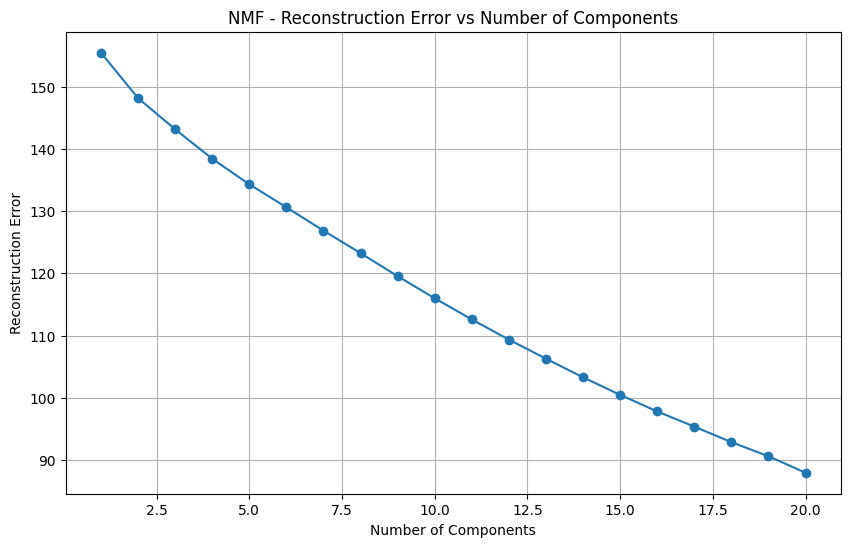

In [7]:
errors = []
components = range(1, 21)

for n in components:
    nmf = NMF(n_components=n, init='nndsvd', random_state=42, max_iter=500)
    nmf.fit(data_scaled)
    errors.append(nmf.reconstruction_err_)

# 繪製誤差曲線
plt.figure(figsize=(10, 6))
plt.plot(components, errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('NMF - Reconstruction Error vs Number of Components')
plt.grid(True)
plt.show()

In [8]:
# 檢查前 5 個樣本的主成分權重
pd.DataFrame(W[:5], columns=[f'Component_{i+1}' for i in range(n_components)])

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10
0,0.000000,0.040264,0.000000,0.044581,0.003163,0.000000,0.000000,0.015319,0.050448,0.000231
1,0.070388,0.004235,0.000130,0.000000,0.005589,0.000000,0.000410,0.000016,0.002045,0.000198
2,0.006062,0.000000,0.004318,0.089869,0.000000,0.048266,0.000533,0.000000,0.000000,0.000000
3,0.000147,0.039443,0.000000,0.001289,0.039850,0.000000,0.000061,0.012122,0.000317,0.000000
4,0.034908,0.039933,0.020928,0.000000,0.041144,0.006461,0.000682,0.000000,0.000000,0.000000


In [9]:
# 檢查每個主成分對原始變數的貢獻
pd.DataFrame(H, columns=data.drop(columns=['ID']).columns)


,Stewed,Prune,Dried,Mixed,Apple,Banana,Berry,Cherry,Grapefruit,Grape,...,Pea,Sweetpepper,Spinach,Sprouts,Sweetcorn,Freshtomato,Tinnedtomato,Turnip_swede,Watercress,Othervegetables
0,0.091575,0.053593,0.080906,0.041451,0.000000,0.00000,0.000000,0.051134,0.031767,0.000000,...,0.010966,0.194430,0.097718,0.000000,0.013043,9.192622,0.000000,0.000000,0.217908,0.092553
1,0.042266,0.091462,0.271580,0.013347,0.000000,6.38296,0.000000,0.011699,0.042215,0.106660,...,0.207971,0.000000,0.014985,0.000000,0.062289,0.000000,0.000000,0.000000,0.000000,0.034967
2,0.183807,0.052964,0.118422,0.115710,0.000000,0.00000,0.000000,0.009121,0.043243,0.000000,...,0.730116,0.000000,0.050196,0.384590,0.142605,0.000000,0.000000,0.287472,0.005611,0.053635
3,0.047156,0.004659,0.087128,0.171042,0.000000,0.00000,0.096095,0.046786,0.032906,0.000000,...,0.000000,0.384559,0.175075,0.000000,0.081909,0.000000,0.000000,0.000000,0.286555,0.075304
4,0.088828,0.060300,0.224885,0.000000,6.179964,0.00000,0.000000,0.000000,0.042011,0.015936,...,0.041121,0.000000,0.054419,0.000000,0.024890,0.000000,0.001735,0.000000,0.000000,0.009573
5,0.139151,0.117189,0.398222,0.069788,0.000000,0.00000,0.000000,0.066469,0.040521,0.000000,...,0.081837,2.665611,0.368683,0.000000,0.305718,0.000000,2.135420,0.038868,0.148790,0.562226
6,0.000000,0.055050,0.139587,0.000000,0.000000,0.00000,0.000000,0.000000,0.024449,0.118542,...,0.085847,0.000000,0.027490,0.046666,0.008166,0.000000,0.005330,0.000000,0.011723,0.025984
7,0.030654,0.209258,0.368097,0.192331,0.000000,0.00000,4.355103,0.370892,0.073092,4.284207,...,0.275635,0.000000,0.090402,0.000000,0.103142,0.000000,0.001942,0.000000,0.087629,0.187541
8,0.000000,0.030899,0.087456,0.163879,0.000000,0.00000,0.000000,0.012012,0.008805,0.000000,...,1.220730,0.000000,0.000000,0.064422,0.259893,0.000000,0.000000,0.023926,0.000000,0.000000
9,0.056220,0.003196,0.095079,0.122187,0.000000,0.00000,0.000000,0.019688,0.010494,0.000000,...,0.000000,0.011499,0.043854,0.000000,0.043686,0.000000,0.024814,0.043597,0.000000,0.020044


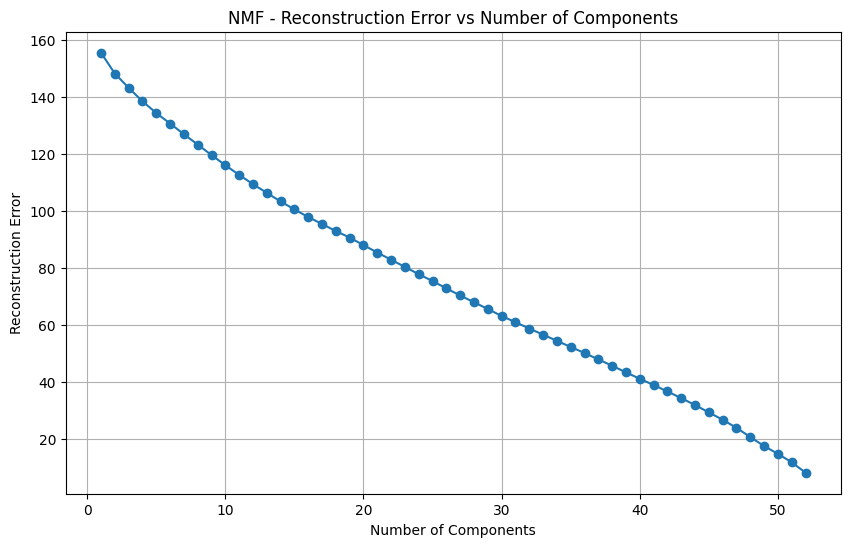

Reconstruction Error: 115.98822461365184
前 5 個樣本的主成分權重：
   Component_1  Component_2  Component_3  Component_4  Component_5  \
0     0.000000     0.040264     0.000000     0.044581     0.003163   
1     0.070388     0.004235     0.000130     0.000000     0.005589   
2     0.006062     0.000000     0.004318     0.089869     0.000000   
3     0.000147     0.039443     0.000000     0.001289     0.039850   
4     0.034908     0.039933     0.020928     0.000000     0.041144   

   Component_6  Component_7  Component_8  Component_9  Component_10  
0     0.000000     0.000000     0.015319     0.050448      0.000231  
1     0.000000     0.000410     0.000016     0.002045      0.000198  
2     0.048266     0.000533     0.000000     0.000000      0.000000  
3     0.000000     0.000061     0.012122     0.000317      0.000000  
4     0.006461     0.000682     0.000000     0.000000      0.000000  
每個主成分對原始變數的貢獻：
     Stewed     Prune     Dried     Mixed     Apple   Banana     Berry  \
0  0.091575  0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# 讀取資料
data = pd.read_csv('diet_data_cleaned.csv')

# 資料縮放
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['ID']))

# 繪製重構誤差隨主成分數量的變化
errors = []
components = range(1, 53)

for n in components:
    nmf = NMF(n_components=n, init='nndsvd', random_state=42, max_iter=500)
    nmf.fit(data_scaled)
    errors.append(nmf.reconstruction_err_)

plt.figure(figsize=(10, 6))
plt.plot(components, errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('NMF - Reconstruction Error vs Number of Components')
plt.grid(True)
plt.show()

In [19]:

# 選擇主成分數量並執行 NMF
n_components = 50
nmf = NMF(n_components=n_components, init='nndsvd', random_state=42, max_iter=500)
W = nmf.fit_transform(data_scaled)
H = nmf.components_

# 重構誤差
print(f"Reconstruction Error: {nmf.reconstruction_err_}")

# 檢查基向量矩陣 W 和係數矩陣 H
W_df = pd.DataFrame(W, columns=[f'Component_{i+1}' for i in range(n_components)])
H_df = pd.DataFrame(H, columns=data.drop(columns=['ID']).columns)

# 輸出前 5 個樣本的主成分權重
print("前 5 個樣本的主成分權重：")
print(W_df.head())

# 輸出每個主成分對原始變數的貢獻
print("每個主成分對原始變數的貢獻：")
print(H_df)


Reconstruction Error: 14.709612920432235
前 5 個樣本的主成分權重：
   Component_1  Component_2  Component_3  Component_4  Component_5  \
0     0.000000     0.032597     0.000000     0.051425     0.000000   
1     0.053028     0.000000     0.000000     0.000000     0.000000   
2     0.000000     0.000000     0.000000     0.051424     0.000000   
3     0.000000     0.032600     0.000000     0.000000     0.043655   
4     0.026514     0.032599     0.023686     0.000000     0.043652   

   Component_6  Component_7  Component_8  Component_9  Component_10  ...  \
0          0.0          0.0     0.018353     0.048935           0.0  ...   
1          0.0          0.0     0.000000     0.000000           0.0  ...   
2          0.0          0.0     0.000000     0.000000           0.0  ...   
3          0.0          0.0     0.000000     0.000000           0.0  ...   
4          0.0          0.0     0.000000     0.000000           0.0  ...   

   Component_41  Component_42  Component_43  Component_44  Compone

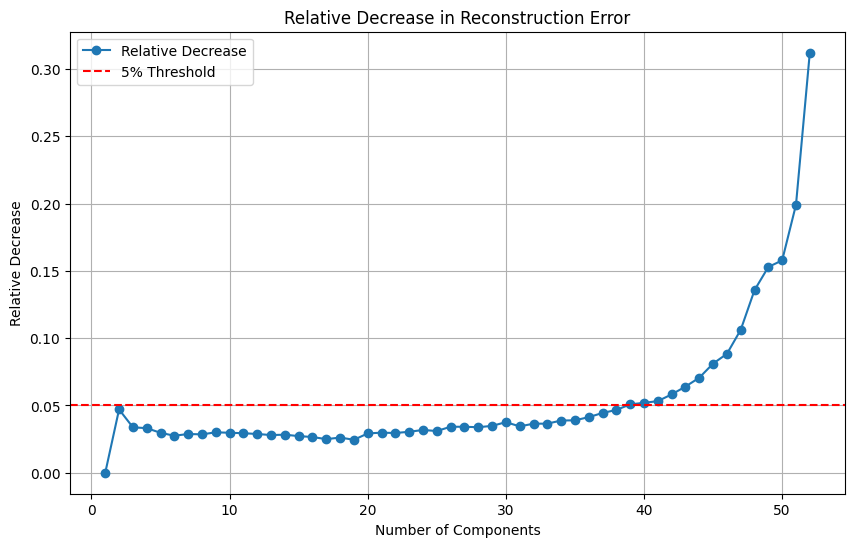

In [14]:
relative_decrease = [0]  # 初始化第1個主成分的下降幅度為0
for i in range(1, len(errors)):
    decrease = (errors[i-1] - errors[i]) / errors[i-1]
    relative_decrease.append(decrease)

# 繪製下降幅度曲線
plt.figure(figsize=(10, 6))
plt.plot(components, relative_decrease, marker='o', label='Relative Decrease')
plt.xlabel('Number of Components')
plt.ylabel('Relative Decrease')
plt.title('Relative Decrease in Reconstruction Error')
plt.axhline(y=0.05, color='r', linestyle='--', label='5% Threshold')
plt.legend()
plt.grid(True)
plt.show()


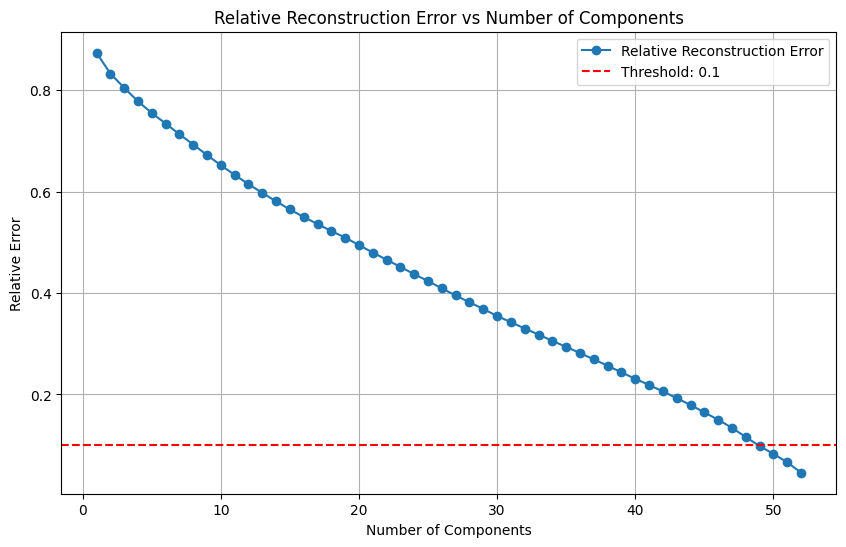

In [15]:
# 計算相對重構誤差
X_norm = np.linalg.norm(data_scaled, 'fro')
relative_errors = [err / X_norm for err in errors]

# 繪製相對誤差曲線
plt.figure(figsize=(10, 6))
plt.plot(components, relative_errors, marker='o', label='Relative Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylabel('Relative Error')
plt.title('Relative Reconstruction Error vs Number of Components')
plt.axhline(y=0.1, color='r', linestyle='--', label='Threshold: 0.1')
plt.legend()
plt.grid(True)
plt.show()


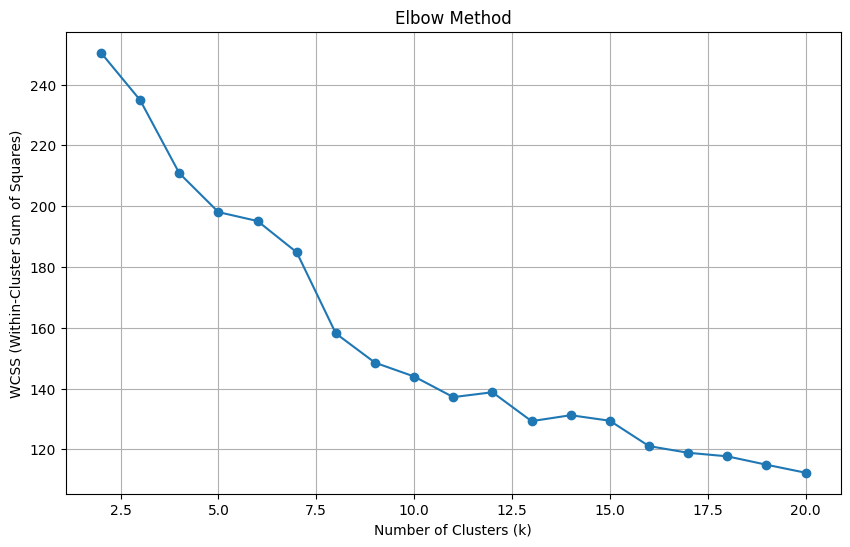

In [ ]:
from sklearn.cluster import KMeans
wcss = []  # 保存每個 k 的 WCSS

# 嘗試不同的 k 值
for k in range(2, 21):  # 假設 k 值範圍在 2 到 20
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(W)
    wcss.append(kmeans.inertia_)

# 繪製肘部法則圖表
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []  # 保存每個 k 的輪廓係數

# 嘗試不同的 k 值
for k in range(2, 21):  # 假設 k 值範圍在 2 到 20
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(W)
    sil_scores.append(silhouette_score(W, clusters))

# 繪製輪廓係數圖表
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), sil_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# 找到最佳 k 值
optimal_k = range(2, 11)[sil_scores.index(max(sil_scores))]
print(f"最佳的 k 值是: {optimal_k}")


In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 設定主成分數量
n_components = 10

# 執行 NMF
nmf = NMF(n_components=n_components, init='nndsvd', random_state=42, max_iter=500)
W = nmf.fit_transform(data_scaled)

# 使用 K-means 分群
k = 3  # 假設分成 3 群
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(W)

# 計算輪廓係數（評估分群效果）
sil_score = silhouette_score(W, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.21634224071589014
